In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import pickle
import nltk
import konlpy
from collections import Counter

In [2]:
with open('final.pkl', 'rb') as f:
    keyword = pickle.load(f)
    
with open('final_text_num.pkl', 'rb') as f:
    number_of_texts = pickle.load(f)

with open('final_whole_num.pkl', 'rb') as f:
    whole_number = pickle.load(f)

In [3]:
with open("old_new.pkl", 'rb') as f:
    kw = pickle.load(f)

with open("count_old_new.pkl", 'rb') as f:
    nt = pickle.load(f)

In [4]:
for keys in number_of_texts.keys():
    print(f"{keys}: {number_of_texts[keys]}")

etc: 0
1970: 2
1980: 10
1990: 119
2000: 353
2010: 151
2020: 16


In [5]:
for keys in nt.keys():
    print(f"{keys}: {nt[keys]}")

recent: 108
old: 543


In [6]:
for keys in keyword.keys():
    print(f"{keys}: {len(keyword[keys])}")

etc: 0
1970: 9
1980: 46
1990: 578
2000: 3690
2010: 1925
2020: 167


In [7]:
text = {
    "etc": "",
    "1970": "",
    "1980": "",
    "1990": "",
    "2000": "",
    "2010": "",
    "2020": ""
}

In [8]:
kor = {
    "etc": [],
    "1970": [],
    "1980": [],
    "1990": [],
    "2000": [],
    "2010": [],
    "2020": []
}

eng = {
    "etc": [],
    "1970": [],
    "1980": [],
    "1990": [],
    "2000": [],
    "2010": [],
    "2020": []
}

In [9]:
kk = {
    "old":[],
    "recent":[]
}

ee = {
    "old":[],
    "recent":[]
}

# kor 은 영어 주제어, eng은 영어 주제어

In [10]:
for keys in keyword.keys():
    for s in keyword[keys]:
        for c in s:
            if ord('가') <= ord(c) <= ord('힣'):
                kor[keys].append(s)
                break
            elif ord('a') <= ord(c.lower()) <= ord('z'):
                eng[keys].append(s)
                break

In [11]:
for keys in kw.keys():
    for s in kw[keys]:
        for c in s:
            if ord('가') <= ord(c) <= ord('힣'):
                kk[keys].append(s)
                break
            elif ord('a') <= ord(c.lower()) <= ord('z'):
                ee[keys].append(s)
                break

In [12]:
# 연대별 데이터를 하나로 합치는 함수 
# no 파라미터에 전달되는 것은 합치지 않음 
def combining(keyword, no = []):
    whole = []
    for keys in keyword.keys():
        if keys in no:
            continue
        whole.append(keyword[keys])

    mydata = np.concatenate(whole).tolist()
    return mydata
def setencize(para):
    string = ' '.join(para)
    return string

In [13]:
cul = []
for word in combining(kor):
    if word.find("문화") != -1:
        cul.append(word)

In [14]:
temp = Counter(cul)
print(temp.most_common(10))

[('다문화주의', 3), ('문화자본론', 2), ('문화자본', 2), ('문화정치학', 2), ('대중문화', 2), ('작업장 문화', 2), ('문화소비', 2), ('문화적 자본', 1), ('문화적', 1), ('기업문화', 1)]


In [15]:
cul_s = setencize(cul)
kmr = konlpy.tag.Komoran()
temp_morphs = []
temp_morphs = kmr.pos(cul_s)
temp_selc = []
temp_no_selec =[]

for word, pos in temp_morphs:
    temp_no_selec.append(word)
    
Featured_POS = ['NNG', 'NNP', 'NP', 'NR', "VV", "VA", "MM", "MAG",]
for word, pos in temp_morphs:
    if pos in Featured_POS:
        temp_selc.append(word)

In [16]:
cc = Counter(temp_no_selec)
# cc = Counter(temp_selc)
print(cc.most_common(20))

[('문화', 57), ('적', 14), ('정체성', 4), ('자본', 3), ('다문화주의', 3), ('정치학', 3), ('화', 3), ('성', 3), ('의', 3), ('소비', 3), ('기업', 2), ('하위문화', 2), ('이론', 2), ('정책', 2), ('연구', 2), ('취향', 2), ('자본론', 2), ('전문', 2), ('대중문화', 2), ('남성', 2)]


In [17]:
# 각 연댑별 주제어들을 하나의 string으로 합친 뒤에 
# komoran POS Tagging으로 다시 나누기
# 각 연대별 

sent = {}
for keys in kor.keys():
    sent[keys] = setencize(kor[keys])

kmr = konlpy.tag.Komoran()
kmr_morphs = {}
for keys in kor.keys():
    kmr_morphs[keys] = kmr.pos(sent[keys])

In [19]:
# komoran 품사 사전 이용해서 명사, 동사, 형용사, 부사 정도만 골라냄 
Featured_POS = ['NNG', 'NNP', 'NP', 'NR', "VV", "VA", "MM", "MAG",]
selected_words = {
    "etc": [],
    "1970": [],
    "1980": [],
    "1990": [],
    "2000": [],
    "2010": [],
    "2020": []
}

for keys in kor.keys():
    for word, pos in kmr_morphs[keys]:
        if pos in Featured_POS:
            selected_words[keys].append(word)

# print(selected_words)

In [20]:
# lll =[]
# for keys in kor.keys():
#     for word, pos in kmr_morphs[keys]:
#         lll.append(word)
# c = Counter(lll)
# print(c.most_common(300))

In [21]:
# 각 연댑별 주제어들을 하나의 string으로 합친 뒤에 
# komoran POS Tagging으로 다시 나누기
# old and recent
tt = {}
for keys in kk.keys():
    tt[keys] = setencize(kk[keys])

kmr = konlpy.tag.Komoran()
kmr_morphs_2 = {}
for keys in kk.keys():
    kmr_morphs_2[keys] = kmr.pos(tt[keys])
    
# komoran 품사 사전 이용해서 명사, 동사, 형용사, 부사 정도만 골라냄 
Featured_POS = ['NNG', 'NNP', 'NP', 'NR', "VV", "VA", "MM", "MAG",]
selected_words_2 = {
    "old":[],
    "recent":[]
}

for keys in kk.keys():
    for word, pos in kmr_morphs_2[keys]:
        if pos in Featured_POS:
            selected_words_2[keys].append(word)

# print(selected_words)

In [22]:
# 불용어 제거 
# "사회" 단어 제거 
# 연대별로 나누어져 있는 dictonary를 파라미터로 넣음 
def ssremove(kor):
    # stopwords = ["사회학", "사회", "사회적", "주의"]
    stopwords = ["사회학", "사회", "사회적"]
    kor_whole = combining(kor)
    unique_Noun_words = set(kor_whole)
    for keys in kor.keys():
        for word in unique_Noun_words:
            if word in stopwords:
                while word in kor[keys]: kor[keys].remove(word)
    return kor

In [50]:
# 불용어 제거한 기별 단어들 
slct_words = ssremove(selected_words)
slct_words


slct_old = combining(slct_words, ["2010", "2020"])
slct_new = combining(slct_words, ["etc", "1970", "1980", "1990", "2000"])


In [24]:
# Counter 객체를 파라미터로 
# 빈도 n개 이상을 반환 
from collections import Counter
def selection(word_list, n):
    c = Counter(word_list)
    newly_selected = []
    for word, count in c.items():
        if count >= n:
            newly_selected.append(word)
    # 선택된 리스트를 바로 쓰는 것이 아니라, 
    # 선택된 것을 바탕으로 원래 리스트에서 골라내야함 
    for word in word_list:
        if word not in newly_selected:
            word_list.remove(word)
    return word_list
         

In [25]:
old_5 = selection(slct_old, 5)
new_5 = selection(slct_new, 5)

In [26]:
# 불용어 제거한 기별 단어들 
slct_words_2 = ssremove(selected_words_2)

# 두 개의 딕셔너리로 구분되어 있음 
recent_5 = selection(slct_words_2["recent"], 5)
obsolete_5 = selection(slct_words_2["old"], 5)

In [27]:
oc = Counter(obsolete_5)
rc = Counter(recent_5)

In [28]:
print("40주년까지 빈도")
print(oc.most_common(10))

print("40주년 ~ 50주년 빈도")
print(rc.most_common(10))

40주년까지 빈도
[('운동', 52), ('국가', 50), ('여성', 42), ('노동', 41), ('스포츠', 41), ('조직', 40), ('문화', 39), ('관계', 38), ('참여', 36), ('정치', 35)]
40주년 ~ 50주년 빈도
[('문화', 18), ('노동', 15), ('제도', 14), ('국가', 11), ('여성', 11), ('온라인', 10), ('청년', 10), ('가족', 10), ('분석', 9), ('연결', 9)]


In [51]:
len(slct_new) + len(slct_old) == len(combining(slct_words))

True

In [30]:
FONT_PATH = r'C:\Users\Autumn\AppData\Local\Microsoft\Windows\Fonts\GmarketSansTTFMedium.ttf' # For Korean characters
# yonsei = np.array(Image.open(r'basic.jpg'))
# colors = ImageColorGenerator(yonsei)

x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 480 ** 2
mask = 255 * mask.astype(int)
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(200,219),np.random.randint(65,94),np.random.randint(31,40)))

wc = WordCloud(mask = mask, color_func=color_func, background_color="white", max_words=1000, max_font_size=1000, random_state=42, width=5000,height=5000, font_path=FONT_PATH)
#contour_color="#00498c", contour_width=1, color_func=colors)

# #f9d40a
#rgb(249, 212, 10)
#hsl(51, 95%, 51%)

# 검은색  #231815
#rgb(35, 24, 21)
#hsl(13, 25%, 11%)

# ㄹ얄 블루 
# hsl 219, 94, 34




In [31]:
number_of_texts

{'etc': 0,
 '1970': 2,
 '1980': 10,
 '1990': 119,
 '2000': 353,
 '2010': 151,
 '2020': 16}

3167


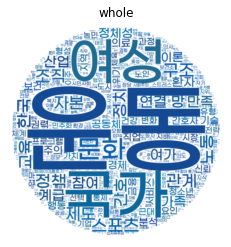

In [32]:
print(len(slct_old))
# 2020, 2010년대는 제외  
# 484개 논문, 4534개 키워드 
noun_text = ' '.join(slct_old)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('before_2010.png')


In [33]:
len(slct_new)

1204

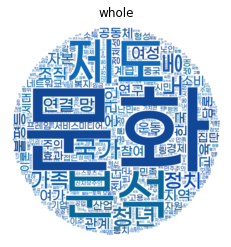

In [34]:
# 2020, 2010년대만
# 167개 논문, 1981개 키워드 

noun_text = ' '.join(slct_new)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('from_2010.png')


In [35]:
len(selected_words_2["old"])

3674

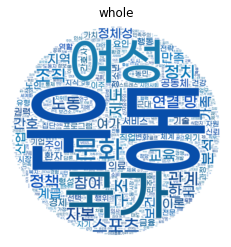

In [36]:
# 2012년까지 
# 543개 논문, 4534개 키워드 
noun_text = ' '.join(selected_words_2["old"])


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('till_2012.png')


In [37]:
len(selected_words_2["recent"])

736

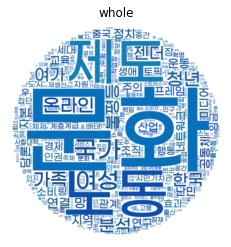

In [38]:
# 2020, 2010년대만
# 108개 논문, 1981개 키워드 

noun_text = ' '.join(selected_words_2["recent"])


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('from_2013.png')


In [39]:
old_5

['베버',
 '정당',
 '재구성',
 '정치의식',
 '이론',
 '현대',
 '운동',
 '변동',
 '지역',
 '권력',
 '구조',
 '갈등',
 '구조',
 '생산',
 '자본',
 '이후',
 '서울시',
 '도시',
 '개발',
 '도시',
 '공간',
 '선초',
 '재배',
 '사회주의',
 '문제',
 '중공',
 '정책',
 '경제',
 '개발',
 '계획',
 '국가',
 '정책',
 '태국',
 '상하',
 '관계',
 '생활',
 '태도',
 '관계',
 '망',
 '성별',
 '직무',
 '분리',
 '성',
 '차별',
 '관행',
 '성별',
 '관계',
 '가족',
 '관계',
 '관계',
 '망',
 '운동',
 '국가',
 '능력',
 '통제',
 '제도',
 '연결',
 '망',
 '결속',
 '공동체',
 '통제',
 '새마을',
 '지도자',
 '민족주의',
 '체제',
 '지배',
 '담론',
 '이데올로기',
 '국가',
 '시민사회',
 '전통',
 '근대',
 '선택',
 '수동',
 '정치',
 '정치',
 '민주화',
 '정치권력',
 '시민사회',
 '세계화',
 '복지',
 '제도',
 '적자',
 '가입',
 '구조',
 '노동',
 '시장',
 '정책',
 '개혁',
 '국가',
 '추출',
 '기구',
 '이데올로기',
 '통합',
 '의존',
 '국가',
 '근대',
 '국민',
 '국가',
 '이익',
 '결합',
 '합리',
 '방식',
 '국가',
 '자율',
 '정치학',
 '한국',
 '정치',
 '전통',
 '개혁',
 '시장',
 '사회주의',
 '구성',
 '장',
 '경제',
 '자본',
 '문화',
 '자본',
 '계급',
 '성',
 '학교',
 '부문',
 '음악',
 '사회화',
 '근대',
 '자본주의',
 '정체성',
 '농민',
 '운동',
 '조직',
 '지대',
 '스트레스',
 '산업',
 '도시',
 '주민',
 '참여',
 '카시',
 '근대성',
 '식민지

3167


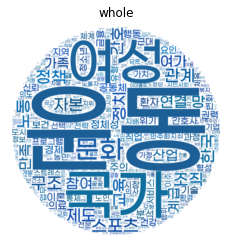

In [40]:
print(len(old_5))
# 2020, 2010년대는 제외  
# 484개 논문, 4534개 키워드 
noun_text = ' '.join(old_5)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('before_2010_5.png')


1204


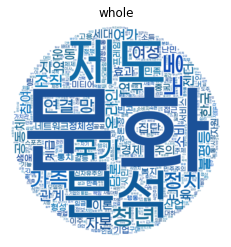

In [ ]:
print(len(new_5))
# 2020년대 2010년대만   
# 484개 논문, 4534개 키워드 
noun_text = ' '.join(new_5)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('after_2010_5.png')


In [47]:
print(len(set(obsolete_5)))

# 40주년까지 
# 484개 논문, 4534개 키워드 
noun_text = ' '.join(obsolete_5)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('before_40th.png')


944


393


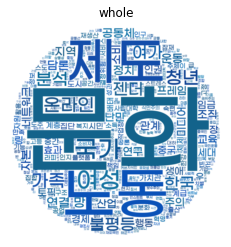

In [48]:
print(len(set(recent_5)))
# 2020년대 2010년대만   
# 484개 논문, 4534개 키워드 
noun_text = ' '.join(recent_5)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('after_40th.png')


# 사용하지 않음 

In [44]:
temp = []
for keys in keyword.keys():
    if keys == "2020" or keys == "2010":
        continue
    temp.append(keyword[keys])

adjusted = np.concatenate(temp).tolist()


In [45]:
len(adjusted) == len(mydata) - len(keyword["2020"])

NameError: name 'mydata' is not defined

In [ ]:
length = 0
for keys in keyword.keys():
    # print(len(keyword[keys]))
    length = length + len(keyword[keys])


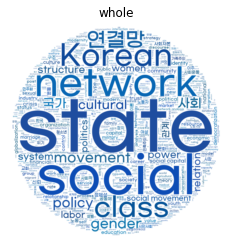

In [ ]:
# 2020, 2010년대는 제외  

noun_text = ' '.join(adjusted)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('c_adjusted.png')


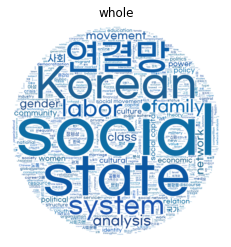

In [ ]:
# 2020년대까지 포함 

noun_text = ' '.join(mydata)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc.recolor(color_func = color_func), interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('c_whole.png')


In [ ]:
len(adjusted) == len(mydata) - len(keyword["2020"])

True

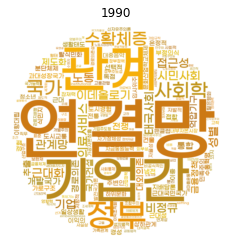

In [ ]:
noun_text = ' '.join(keyword["1990"])


wc.generate(noun_text)
plt.title("1990")
plt.imshow(wc.recolor(color_func = color_func), interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('c_1990.png')


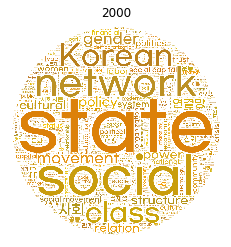

In [ ]:
noun_text = ' '.join(keyword["2000"])


wc.generate(noun_text)
plt.title("2000")
plt.imshow(wc.recolor(color_func = color_func), interpolation="nearest")
plt.axis("off")
plt.show()
wc.to_file('c_2000.png')


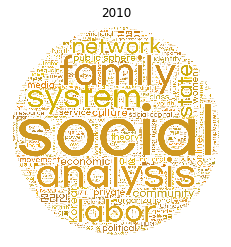

In [ ]:
noun_text = ' '.join(keyword["2010"])


wc.generate(noun_text)
plt.title("2010")
plt.imshow(wc.recolor(color_func = color_func), interpolation="nearest")
plt.axis("off")
plt.show()
wc.to_file('c_2010.png')


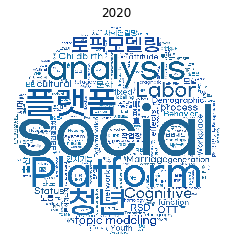

In [ ]:
noun_text = ' '.join(keyword["2020"])


wc.generate(noun_text)
plt.title("2020")
plt.imshow(wc.recolor(color_func = color_func), interpolation="nearest")
plt.axis("off")
plt.show()
wc.to_file('c_2020.png')
